# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np 
import pandas as pd
import category_encoders as ce
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')


# 데이터 로드

In [2]:
train = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\train.csv")
test = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\test.csv")
submission = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\submission.csv")

## train data

In [3]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [5]:
train.shape

(916, 12)

## test data

In [6]:
test.head()

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


In [8]:
test.shape

(393, 11)

## submission data

In [9]:
submission.head()

,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [10]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   survived     393 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [11]:
submission.shape

(393, 2)

# EDA / 결측치 제거


In [12]:
o_train = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\train.csv")
o_test = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\test.csv")


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [14]:
train.head(), test.head()

(   passengerid  survived  pclass  \
 0            0         0       2   
 1            1         0       3   
 2            2         1       1   
 3            3         1       3   
 4            4         0       2   
 
                                                 name  gender   age  sibsp  \
 0                     Wheeler, Mr. Edwin Frederick""    male   NaN      0   
 1                                 Henry, Miss. Delia  female   NaN      0   
 2  Hays, Mrs. Charles Melville (Clara Jennings Gr...  female  52.0      1   
 3       Andersson, Mr. August Edvard ("Wennerstrom")    male  27.0      0   
 4                                  Hold, Mr. Stephen    male  44.0      1   
 
    parch         ticket     fare cabin embarked  
 0      0  SC/PARIS 2159  12.8750   NaN        S  
 1      0         382649   7.7500   NaN        Q  
 2      1          12749  93.5000   B69        S  
 3      0         350043   7.7958   NaN        S  
 4      0          26707  26.0000   NaN        S  ,

In [15]:
test.head()

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [16]:
age_mean = o_train['age'].mean()
fare_mean = o_train['fare'].mean()
cabin_mode = o_train['cabin'].mode().values[0]
embarked_mode = o_train['embarked'].mode().values[0]


age_mean, fare_mean, cabin_mode, embarked_mode 

o_train['age'].fillna(age_mean, inplace=True)
o_test['age'].fillna(age_mean, inplace=True)

o_train['fare'].fillna(fare_mean, inplace=True)
o_test['fare'].fillna(fare_mean, inplace=True)

o_train['cabin'].fillna(cabin_mode, inplace=True)
o_test['cabin'].fillna(cabin_mode, inplace=True)

o_train['embarked'].fillna(embarked_mode, inplace=True)
o_test['embarked'].fillna(embarked_mode, inplace=True)

o_train.isnull().sum().sum(), o_test.isnull().sum().sum()

(0, 0)

In [17]:
train_dt = o_train
test_dt = o_test

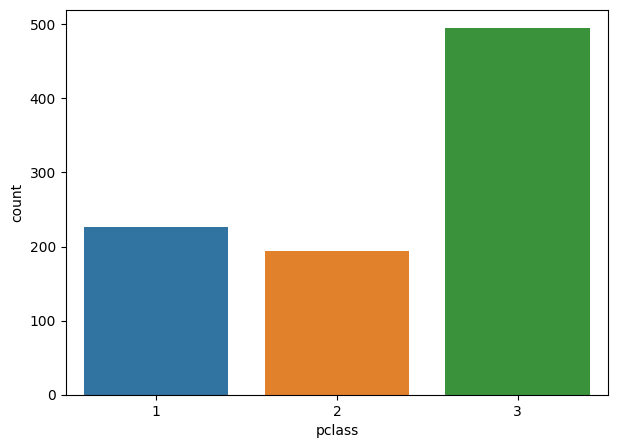

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
 
sns.countplot(data=train_dt, x='pclass', ax=ax)
 
plt.show()

In [19]:
train_dt[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.577093
1,2,0.391753
2,3,0.280808


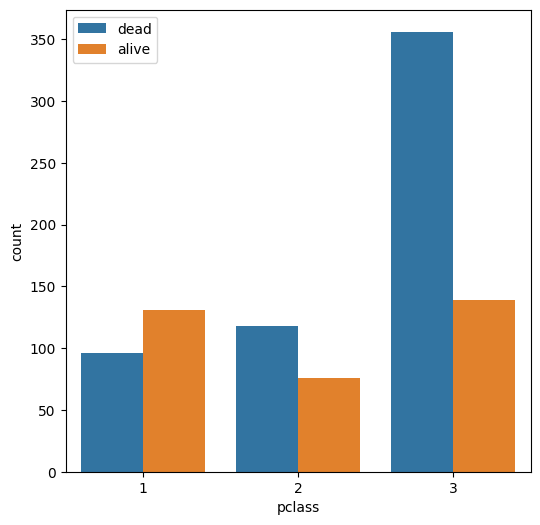

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
 
sns.countplot(data=train_dt, x='pclass', hue='survived', ax=ax)
 
#범례 한글로 변경
labels=['dead', 'alive']
ax.legend(labels=labels)
 
plt.show()

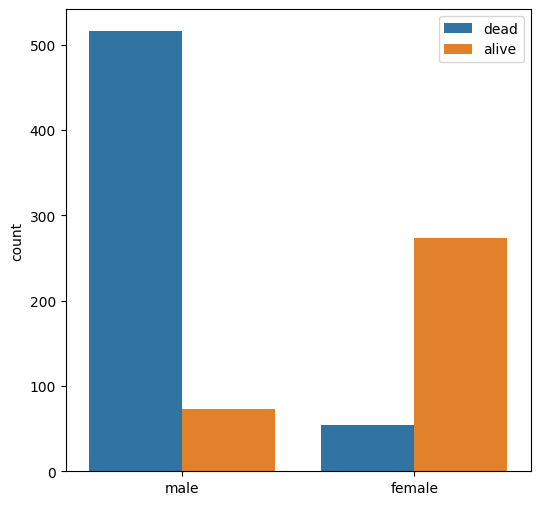

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
 
sns.countplot(data=train_dt, x='gender', hue='survived', ax=ax)
 
ax.set(xticklabels=['male', 'female'], xlabel='')
 
#범례 한글로 변경
labels=['dead', 'alive']
ax.legend(labels=labels)
 
plt.show()

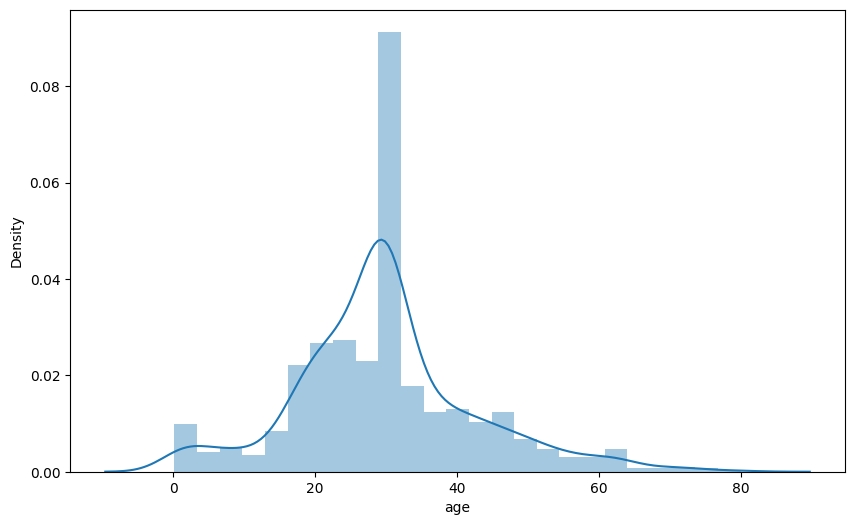

In [22]:
# 나이 분포

fig, ax = plt.subplots(figsize=(10,6))
 
sns.distplot(train_dt['age'], bins=25, ax=ax)
 
plt.show()

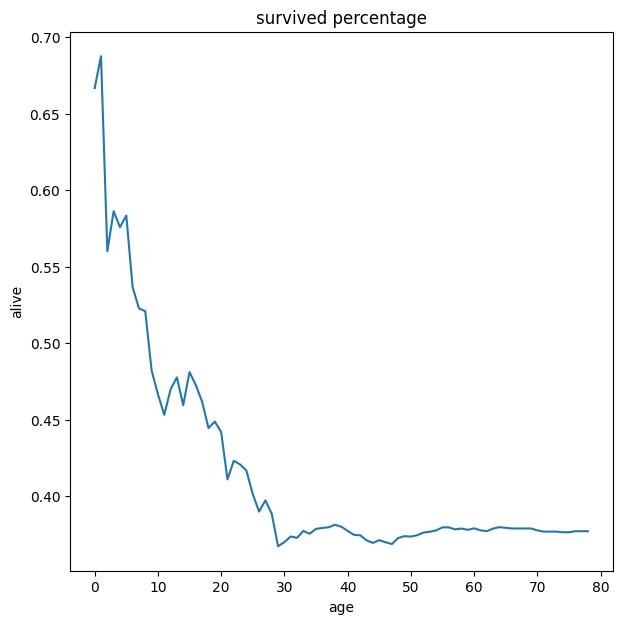

In [23]:
# 나이별 생존률

age_range_survival_ratio = []
 
# 1살 부터 생존율 구하기
for i in range(1,80):
    age_range_survival_ratio.append(train_dt[train_dt['age'] < i]['survived'].sum() / len(train_dt[train_dt['age'] < i]['survived']))
 
plt.figure(figsize=(7,7))
plt.plot(age_range_survival_ratio)
plt.title('survived percentage')
plt.ylabel('alive')
plt.xlabel('age')
 
plt.show()

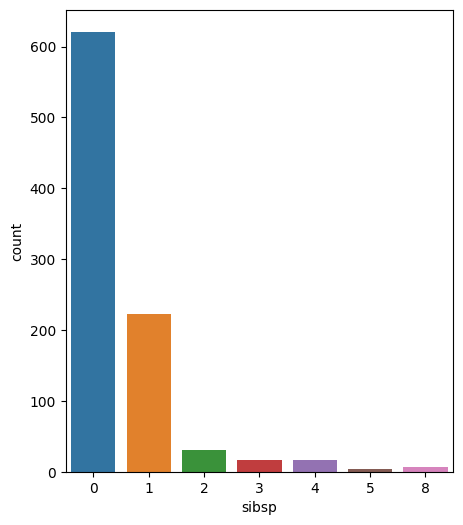

In [24]:
# sibsp 

fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='sibsp')
 
plt.show()

In [25]:
train_dt[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.531532
2,2,0.433333
0,0,0.333333
5,5,0.250000
3,3,0.235294
6,8,0.166667
4,4,0.125000


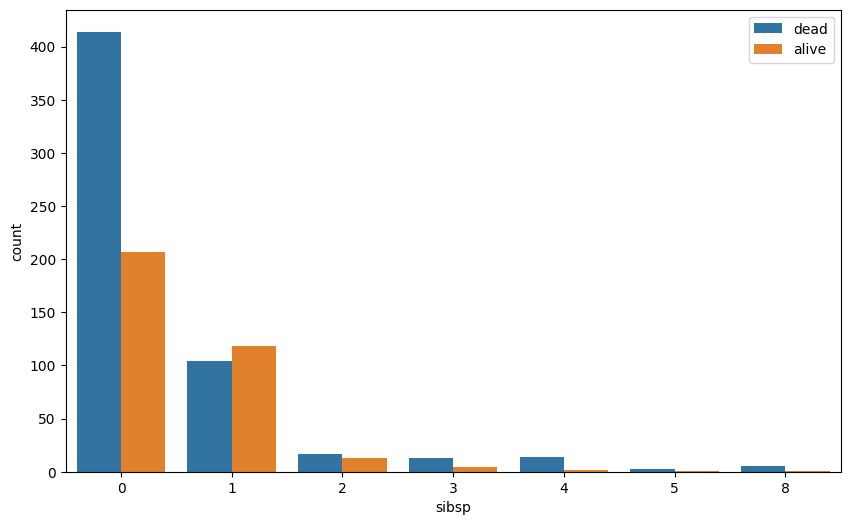

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
 
sns.countplot(data=train_dt, x='sibsp', hue='survived', ax=ax)
 
#범례 한글로 변경
ax.legend(labels=['dead', 'alive'])
 
plt.show()

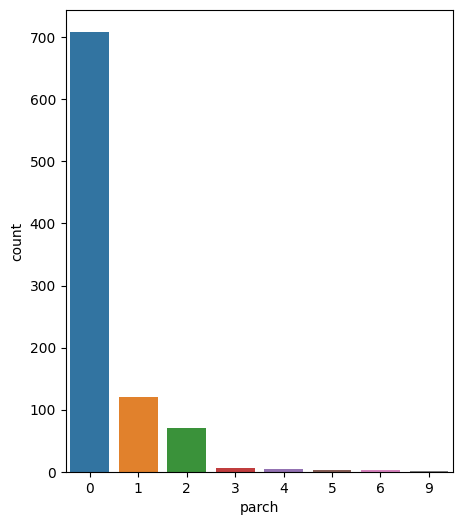

In [27]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='parch')
 
plt.show()

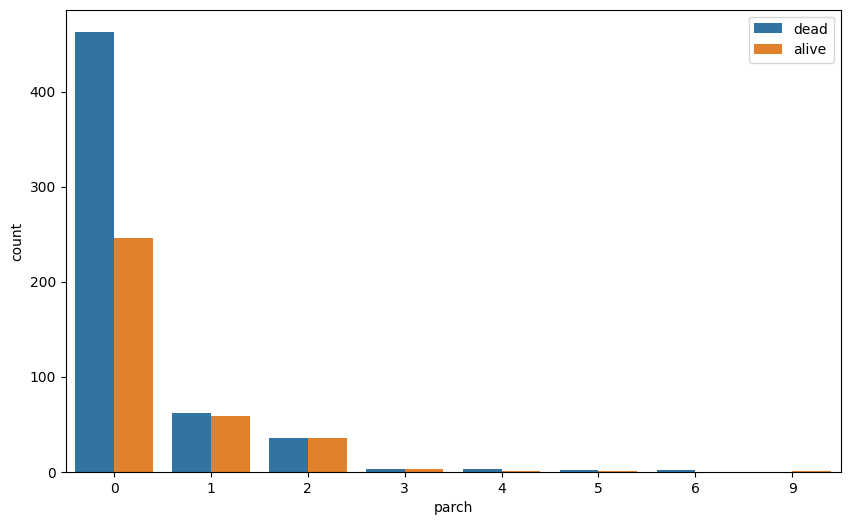

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
 
sns.countplot(data=train_dt, x='parch', hue='survived', ax=ax)
 
#범례 한글로 변경
ax.legend(labels=labels)
 
plt.show()

In [29]:
train_dt[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
1,Q,0.493827
0,C,0.486772
2,S,0.331269


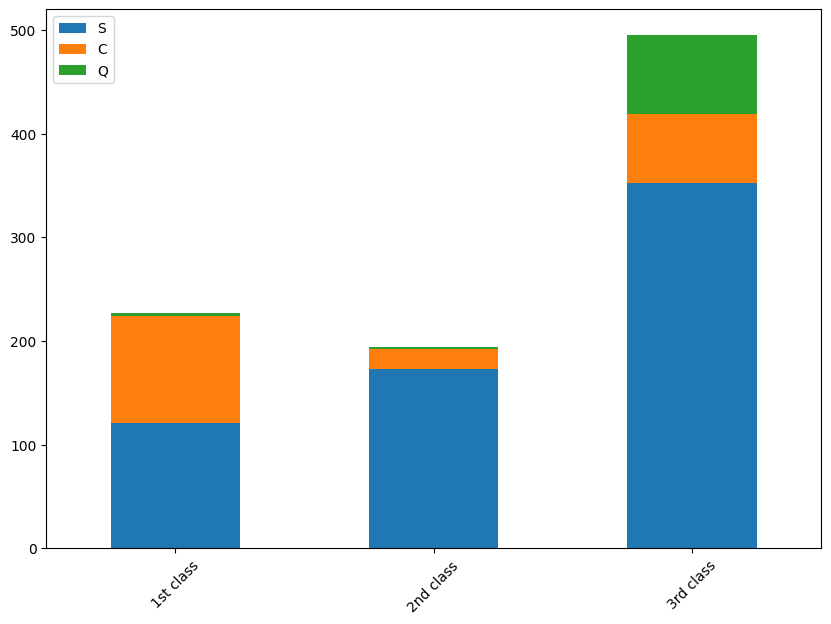

In [30]:
# pclass 별로 데이터를 나눠줍니다
Pclass1 = train_dt[train_dt['pclass']==1]['embarked'].value_counts()
Pclass2 = train_dt[train_dt['pclass']==2]['embarked'].value_counts()
Pclass3 = train_dt[train_dt['pclass']==3]['embarked'].value_counts()
 
# DataFrame으로 만들어서 그래프
fig, ax = plt.subplots(figsize=(10,7))
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, ax=ax)
 
# xlabel 회전
plt.xticks(rotation=45)
 
plt.show()

S항구에 class3인 사람이 많다

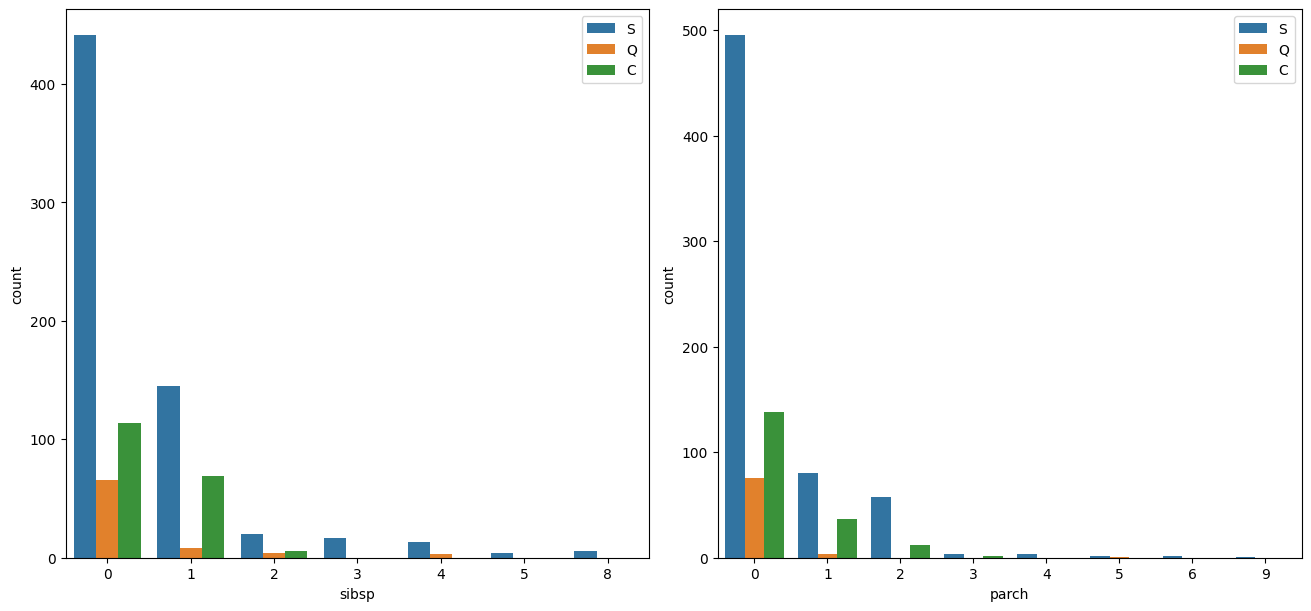

In [31]:
fig, ax = plt.subplots(1,2,figsize=(13,6), constrained_layout=True)
 
sns.countplot(data=train_dt, x='sibsp', hue='embarked', ax=ax[0])
sns.countplot(data=train_dt, x='parch', hue='embarked', ax=ax[1])
 
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
 
plt.show()

S항구에 혼자 탄 사람이 많다

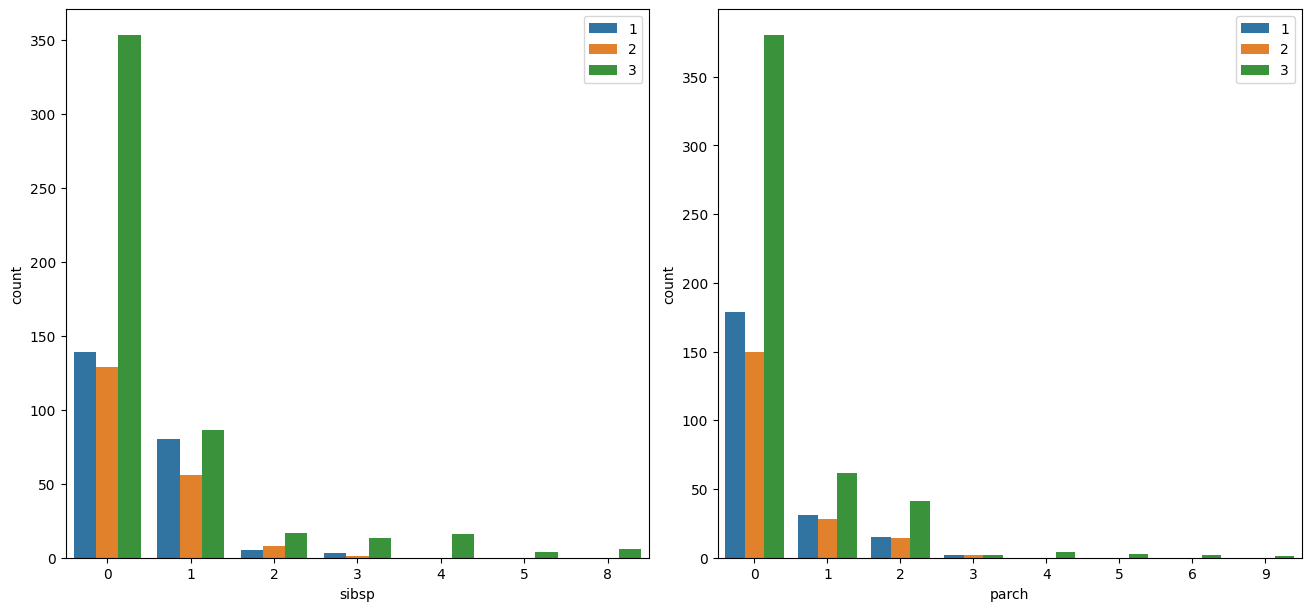

In [32]:
fig, ax = plt.subplots(1,2,figsize=(13,6), constrained_layout=True)
 
sns.countplot(data=train_dt, x='sibsp', hue='pclass', ax=ax[0])
sns.countplot(data=train_dt, x='parch', hue='pclass', ax=ax[1])
 
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
 
plt.show()

S항구에서 나홀로 3클래스에 탄 탑승객의 사망률이 높다

# Feature 추가 
> 성별, 나이에 따른 기초대사랑, 키, 몸무게

In [33]:
o_train['parch+sibsp'] = o_train.apply(lambda x: x['parch']+x['sibsp']+1, axis=1)
o_test['parch+sibsp'] = o_test.apply(lambda x: x['parch']+x['sibsp']+1, axis=1)

o_train['parch*sibsp'] = o_train.apply(lambda x: x['parch']*x['sibsp'], axis=1)
o_test['parch*sibsp'] = o_test.apply(lambda x: x['parch']*x['sibsp'], axis=1)

o_train['sex'] = o_train['gender'].map({'male':1, 'female':0})
o_test['sex'] = o_test['gender'].map({'male':1, 'female':0})

o_train['sex+p+s']=o_train['sex']+o_train['parch+sibsp']
o_test['sex+p+s']=o_test['sex']+o_test['parch+sibsp']

o_train['sex*p+s']=o_train['sex']*o_train['parch+sibsp']
o_test['sex*p+s']=o_test['sex']*o_test['parch+sibsp']

o_train['sex+p*s']=o_train['sex']+o_train['parch*sibsp']
o_test['sex+p*s']=o_test['sex']+o_test['parch*sibsp']

o_train['sex*p*s']=o_train['sex']*o_train['parch*sibsp']
o_test['sex*p*s']=o_test['sex']*o_test['parch*sibsp']

o_train['ps*pclass'] = o_train.apply(lambda x: x['parch+sibsp']*x['pclass'], axis=1)
o_test['ps*pclass'] = o_test.apply(lambda x: x['parch+sibsp']*x['pclass'], axis=1)

o_train['embarked'] = o_train['embarked'].map({'Q':1, 'C':2, 'S':3})
o_test['embarked'] = o_test['embarked'].map({'Q':1, 'C':2, 'S':3})

o_train['multi'] = o_train['age']*o_train['parch+sibsp']*o_train['pclass']*o_train['embarked']
o_test['multi'] = o_test['age']*o_test['parch+sibsp']*o_test['pclass']*o_test['embarked']


## 나이, 성별에 따른 기초대사량

https://www.joongang.co.kr/article/3564449#home

In [34]:
def age_gender_change(age=None, gender=None):
    if (age>=0 and age<3 and gender=='male'):
        cal=700
        return cal
    elif (age>=0 and age<3 and gender=='female'):
        cal=700
        return cal
    elif (age>=3 and age<6 and gender=='male'):
        cal=900
        return cal
    elif (age>=3 and age<6 and gender=='female'):
        cal=860
        return cal
    elif (age>=6 and age<9 and gender=='male'):
        cal=1090
        return cal
    elif (age>=6 and age<9 and gender=='female'):
        cal=1000
        return cal
    elif (age>=9 and age<12 and gender=='male'):
        cal=1290
        return cal
    elif (age>=9 and age<12 and gender=='female'):
        cal=1180
        return cal
    elif (age>=12 and age<15 and gender=='male'):
        cal=1480
        return cal
    elif (age>=12 and age<15 and gender=='female'):
        cal=1340
        return cal
    elif (age>=15 and age<18 and gender=='male'):
        cal=1610
        return cal
    elif (age>=15 and age<18 and gender=='female'):
        cal=1300
        return cal
    elif (age>=18 and age<30 and gender=='male'):
        cal=1550
        return cal
    elif (age>=18 and age<30 and gender=='female'):
        cal=1210
        return cal
    elif (age>=30 and age<50 and gender=='male'):
        cal=1500
        return cal
    elif (age>=30 and age<50 and gender=='female'):
        cal=1170
        return cal
    elif (age>=50 and age<70 and gender=='male'):
        cal=1350
        return cal
    elif (age>=50 and age<70 and gender=='female'):
        cal=1110
        return cal
    elif (age>=70 and gender=='male'):
        cal=1220
        return cal
    else:
        cal=1010
        return cal

## 나이, 성별에 따른 키

https://m.blog.naver.com/autjymaym/220600088685

In [35]:
def age_gender_change2(age=None, gender=None):
    if (age>=0 and age<0.25 and gender=='male'):
        height=50.1
        return height
    elif (age>=0 and age<0.25 and gender=='female'):
        height=49.4
        return height
    elif (age>=0.25 and age<0.5 and gender=='male'):
        height=67.6
        return height
    elif (age>=0.25 and age<0.5 and gender=='female'):
        height=66.3
        return height
    elif (age>=0.5 and age<1 and gender=='male'):
        height=76
        return height
    elif (age>=0.5 and age<1 and gender=='female'):
        height=74.8
        return height
    elif (age>=1 and age<1.5 and gender=='male'):
        height=81.2
        return height
    elif (age>=1 and age<1.5 and gender=='female'):
        height=79.9
        return height
    elif (age>=1.5 and age<2 and gender=='male'):
        height=86.2
        return height
    elif (age>=1.5 and age<2 and gender=='female'):
        height=85
        return height
    elif (age>=2 and age<3 and gender=='male'):
        height=93.1
        return height
    elif (age>=2 and age<3 and gender=='female'):
        height=91.9
        return height
    elif (age>=3 and age<4 and gender=='male'):
        height=100.3
        return height
    elif (age>=3 and age<4 and gender=='female'):
        height=99.2
        return height
    elif (age>=4 and age<5 and gender=='male'):
        height=107.2
        return height
    elif (age>=4 and age<5 and gender=='female'):
        height=106.1
        return height
    elif (age>=5 and age<6 and gender=='male'):
        height=113.6
        return height
    elif (age>=5 and age<6 and gender=='female'):
        height=112.5
        return height
    elif (age>=6 and age<7 and gender=='male'):
        height=119.5
        return height
    elif (age>=6 and age<7 and gender=='female'):
        height=118.3
        return height
    elif (age>=7 and age<8 and gender=='male'):
        return 123.7
    elif (age>=7 and age<8 and gender=='female'):
        return 122.4
    elif (age>=8 and age<9 and gender=='male'):
        return 129.1
    elif (age>=8 and age<9 and gender=='female'):
        return 127.8
    elif (age>=9 and age<10 and gender=='male'):
        return 134.2
    elif (age>=9 and age<10 and gender=='female'):
        return 133.5
    elif (age>=10 and age<11 and gender=='male'):
        return 139.4
    elif (age>=10 and age<11 and gender=='female'):
        return 139.9
    elif (age>=11 and age<12 and gender=='male'):
        return 145.3
    elif (age>=11 and age<12 and gender=='female'):
        return 146.7
    elif (age>=12 and age<13 and gender=='male'):
        return 151.8
    elif (age>=12 and age<13 and gender=='female'):
        return 152.7
    elif (age>=13 and age<14 and gender=='male'):
        return 159
    elif (age>=13 and age<14 and gender=='female'):
        return 156.6
    elif (age>=14 and age<15 and gender=='male'):
        return 165.5
    elif (age>=14 and age<15 and gender=='female'):
        return 158.5
    elif (age>=15 and age<16 and gender=='male'):
        return 169.7
    elif (age>=15 and age<16 and gender=='female'):
        return 159.4
    elif (age>=16 and age<17 and gender=='male'):
        return 171.8
    elif (age>=16 and age<17 and gender=='female'):
        return 160
    elif (age>=17 and age<18 and gender=='male'):
        return 172.8
    elif (age>=17 and age<18 and gender=='female'):
        return 160.4
    elif (age>=18 and gender=='male'):
        height=173.4
        return height
    else:
        height=160.7
        return height

## 나이, 성별에 따른 몸무게

In [36]:
def age_gender_change3(age=None, gender=None):
    if (age>=0 and age<0.25 and gender=='male'):
        return 3.4
    elif (age>=0 and age<0.25 and gender=='female'):
        return 3.3
    elif (age>=0.25 and age<0.5 and gender=='male'):
        return 8
    elif (age>=0.25 and age<0.5 and gender=='female'):
        return 7.5
    elif (age>=0.5 and age<1 and gender=='male'):
        return 9.9
    elif (age>=0.5 and age<1 and gender=='female'):
        return 9.4
    elif (age>=1 and age<1.5 and gender=='male'):
        return 11.1
    elif (age>=1 and age<1.5 and gender=='female'):
        return 10.5
    elif (age>=1.5 and age<2 and gender=='male'):
        return 12.3
    elif (age>=1.5 and age<2 and gender=='female'):
        return 11.7
    elif (age>=2 and age<3 and gender=='male'):
        return 14
    elif (age>=2 and age<3 and gender=='female'):
        return 13.4
    elif (age>=3 and age<4 and gender=='male'):
        return 15.9
    elif (age>=3 and age<4 and gender=='female'):
        return 15.3
    elif (age>=4 and age<5 and gender=='male'):
        return 18.1
    elif (age>=4 and age<5 and gender=='female'):
        return 17.4
    elif (age>=5 and age<6 and gender=='male'):
        return 20.4
    elif (age>=5 and age<6 and gender=='female'):
        return 19.6
    elif (age>=6 and age<7 and gender=='male'):
        return 22.9
    elif (age>=6 and age<7 and gender=='female'):
        return 22
    elif (age>=7 and age<8 and gender=='male'):
        return 24.8
    elif (age>=7 and age<8 and gender=='female'):
        return 23.9
    elif (age>=8 and age<9 and gender=='male'):
        return 27.8
    elif (age>=8 and age<9 and gender=='female'):
        return 26.9
    elif (age>=9 and age<10 and gender=='male'):
        return 31.3
    elif (age>=9 and age<10 and gender=='female'):
        return 30.5
    elif (age>=10 and age<11 and gender=='male'):
        return 35.5
    elif (age>=10 and age<11 and gender=='female'):
        return 35.7
    elif (age>=11 and age<12 and gender=='male'):
        return 40.3
    elif (age>=11 and age<12 and gender=='female'):
        return 39.2
    elif (age>=12 and age<13 and gender=='male'):
        return 45.5
    elif (age>=12 and age<13 and gender=='female'):
        return 43.8
    elif (age>=13 and age<14 and gender=='male'):
        return 50.7
    elif (age>=13 and age<14 and gender=='female'):
        return 47.8
    elif (age>=14 and age<15 and gender=='male'):
        return 55.4
    elif (age>=14 and age<15 and gender=='female'):
        return 50.9
    elif (age>=15 and age<16 and gender=='male'):
        return 59.4
    elif (age>=15 and age<16 and gender=='female'):
        return 52.8
    elif (age>=16 and age<17 and gender=='male'):
        return 62.4
    elif (age>=16 and age<17 and gender=='female'):
        return 53.6
    elif (age>=17 and age<18 and gender=='male'):
        return 64.5
    elif (age>=17 and age<18 and gender=='female'):
        return 53.9
    elif (age>=18 and gender=='male'):
        return 65.8
    else:
        return 54.1

## Feautre 함수 적용

In [37]:
o_train['cal'] = o_train.apply(lambda x: age_gender_change(age=x['age'], gender=x['gender']), axis=1)
o_test['cal'] = o_test.apply(lambda x: age_gender_change(age=x['age'], gender=x['gender']), axis=1)

o_train['height'] = o_train.apply(lambda x: age_gender_change2(age=x['age'], gender=x['gender']), axis=1)
o_test['height'] = o_test.apply(lambda x: age_gender_change2(age=x['age'], gender=x['gender']), axis=1)

o_train['weight'] = o_train.apply(lambda x: age_gender_change3(age=x['age'], gender=x['gender']), axis=1)
o_test['weight'] = o_test.apply(lambda x: age_gender_change3(age=x['age'], gender=x['gender']), axis=1)

o_train['bmi'] = o_train.apply(lambda x: x['weight']/x['height']/x['height']*10000, axis=1)
o_test['bmi'] = o_test.apply(lambda x: x['weight']/x['height']/x['height']*10000, axis=1)

# Scaling

In [38]:
scaling_cols = ['fare', 'age', 'cal', 'height', 'weight', 'bmi', 'multi']

x_tr = o_train[scaling_cols]
y_tr = o_train['survived']

x_te = o_test[scaling_cols]
x_tr.shape, y_tr.shape, x_te.shape

((916, 7), (916,), (393, 7))

In [39]:
x_tr.isnull().sum().sum(), x_te.isnull().sum().sum()

(0, 0)

In [40]:
from sklearn.preprocessing import PowerTransformer
ptf = PowerTransformer()
#ptf.fit(x_tr)
#x_train_scaled = ptf.transform(x_tr)
#x_test_scaled = ptf.transform(x_te)

from sklearn.preprocessing import QuantileTransformer
qtf = QuantileTransformer()
qtf.fit(x_tr)
x_train_scaled = qtf.transform(x_tr)
x_test_scaled = qtf.transform(x_te)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#std.fit(x_tr)
#x_train_scaled = std.transform(x_tr)
#x_test_scaled = std.transform(x_te)

from sklearn.preprocessing import MinMaxScaler
mas = MinMaxScaler()
#mas.fit(x_tr)
#x_train_scaled = mas.transform(x_tr)
#x_test_scaled = mas.transform(x_te)

from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
#x_train_scaled = rbs.fit_transform(x_tr)
#x_test_scaled = rbs.transform(x_te)

from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
#mas.fit(x_tr)
#x_train_scaled = mas.transform(x_tr)
#x_test_scaled = mas.transform(x_te)


In [41]:
x_tr=pd.DataFrame(x_train_scaled, columns=scaling_cols).reset_index(drop=True)
x_te=pd.DataFrame(x_test_scaled, columns=scaling_cols).reset_index(drop=True)
x_te.shape

(393, 7)

In [42]:
x_tr.isnull().sum().sum(), x_te.isnull().sum().sum()

(0, 0)

# Encoding


## Onehot Encoding

In [43]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoding_cols1 = ['gender', 'ps*pclass', 'embarked']

x_tr1 = o_train[encoding_cols1]
x_te1 = o_test[encoding_cols1]

In [44]:
encoder = ce.OneHotEncoder(use_cat_names=True)

enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

for col in x_tr1.columns:
  _enco = encoder.fit_transform(x_tr1[col].astype('category'))
  enco_tr = pd.concat([enco_tr, _enco], axis=1)

  _enco = encoder.transform(x_te1[col].astype('category'))
  enco_te = pd.concat([enco_te, _enco], axis=1)

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.columns

(916, 20) / (393, 20)


Index(['gender_male', 'gender_female', 'ps*pclass_2.0', 'ps*pclass_3.0',
       'ps*pclass_4.0', 'ps*pclass_9.0', 'ps*pclass_33.0', 'ps*pclass_6.0',
       'ps*pclass_24.0', 'ps*pclass_15.0', 'ps*pclass_1.0', 'ps*pclass_10.0',
       'ps*pclass_8.0', 'ps*pclass_18.0', 'ps*pclass_5.0', 'ps*pclass_21.0',
       'ps*pclass_12.0', 'embarked_3.0', 'embarked_1.0', 'embarked_2.0'],
      dtype='object')

In [45]:
x_tr1 = x_tr1.reset_index(drop=True)
x_te1 = x_te1.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

x_tr1.shape, enco_tr.shape

((916, 3), (916, 20))

In [46]:
encoding_tr1 = pd.concat([x_tr1,enco_tr],axis=1).reset_index(drop=True)
encoding_te1 = pd.concat([x_te1,enco_te],axis=1).reset_index(drop=True)

print(f'{encoding_tr1.shape} / {encoding_te1.shape}')
encoding_tr1.columns

(916, 23) / (393, 23)


Index(['gender', 'ps*pclass', 'embarked', 'gender_male', 'gender_female',
       'ps*pclass_2.0', 'ps*pclass_3.0', 'ps*pclass_4.0', 'ps*pclass_9.0',
       'ps*pclass_33.0', 'ps*pclass_6.0', 'ps*pclass_24.0', 'ps*pclass_15.0',
       'ps*pclass_1.0', 'ps*pclass_10.0', 'ps*pclass_8.0', 'ps*pclass_18.0',
       'ps*pclass_5.0', 'ps*pclass_21.0', 'ps*pclass_12.0', 'embarked_3.0',
       'embarked_1.0', 'embarked_2.0'],
      dtype='object')

## Ordinal Encoding

In [47]:
encoding_cols2 = ['ps*pclass', 'pclass', 'sibsp', 'parch', 'parch+sibsp']
encoder = ce.OrdinalEncoder(cols = encoding_cols2)

x_tr2 = o_train[encoding_cols2]
x_te2 = o_test[encoding_cols2]

In [48]:
enco_tr = encoder.fit_transform(x_tr2)
enco_te = encoder.transform(x_te2)

In [49]:

x_tr2 = x_tr2.reset_index(drop=True)
x_te2 = x_te2.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

encoding_tr2 = pd.concat([enco_tr],axis=1).reset_index(drop=True)
encoding_te2 = pd.concat([enco_te],axis=1).reset_index(drop=True)

x_te.isnull().sum(), encoding_te1.isnull().sum(), encoding_te2.isnull().sum()

encoding_tr2.columns

Index(['ps*pclass', 'pclass', 'sibsp', 'parch', 'parch+sibsp'], dtype='object')

## Target Encoding

In [50]:
encoding_cols3 = ['cabin']
encoder = ce.TargetEncoder()

x_tr3 = o_train[encoding_cols3]
x_te3 = o_test[encoding_cols3]
target_tr = o_train['survived']

In [51]:
enco_tr = encoder.fit_transform(x_tr3.reset_index(drop=True), target_tr.reset_index(drop=True))
enco_te = encoder.transform(x_te3)

x_tr3 = x_tr3.reset_index(drop=True)
x_te3 = x_te3.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

encoding_tr3 = pd.concat([enco_tr],axis=1).reset_index(drop=True)
encoding_te3 = pd.concat([enco_te],axis=1).reset_index(drop=True)

encoding_tr3.columns

Index(['cabin'], dtype='object')

In [52]:
encoding_tr3.isnull().sum(), encoding_te3.isnull().sum()

(cabin    0
 dtype: int64,
 cabin    0
 dtype: int64)

# Scaling Enncoding DataFrame 합치기

In [53]:
df_tr = pd.concat([x_tr, encoding_tr1, encoding_tr2, encoding_tr3],axis=1).reset_index(drop=True)
df_te = pd.concat([x_te, encoding_te1, encoding_te2, encoding_te3],axis=1).reset_index(drop=True)
df_tr.drop(encoding_cols1, inplace=True, axis=1)
df_te.drop(encoding_cols1, inplace=True, axis=1)
encoding_tr2.columns

Index(['ps*pclass', 'pclass', 'sibsp', 'parch', 'parch+sibsp'], dtype='object')

In [54]:
y = o_train['survived']

# train_test_split

In [55]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(df_tr, y, test_size=0.2, stratify=o_train['survived'], random_state=21)

In [56]:
X_tr.isnull().sum().sum(), X_te.isnull().sum().sum(), y_tr.isnull().sum().sum(), y_te.isnull().sum().sum(), X_tr.shape, y_te.shape

(0, 0, 0, 0, (732, 32), (184,))

# Decision Tree Classifier

In [57]:
test = pd.concat([df_te, o_test['passengerid']],axis=1).reset_index(drop=True)
test.set_index(['passengerid'], inplace=True)
test.shape

(393, 32)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc 

hp = {
    "random_state":42,
    "max_depth":4 ,# 최대 깊이
    "min_samples_split":2, # 노드를 분할하는데 필요한 최소한의 샘플수
    "criterion" : "entropy", # 순수도 척도
    "max_leaf_nodes" : 10, # 최대리프노드수, 과적합 방지
    "min_samples_leaf" : 20, # 리프노드에 있어야할 최소 샘플수
}

dt = DecisionTreeClassifier(**hp).fit(X_tr, y_tr) 
dt.fit(X_tr, y_tr)

test_pred_dt = dt.predict_proba(test)[:,1]

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0).fit(X_tr, y_tr)

test_pred_rf = rf.predict_proba(test)[:, 1]

### Bagging 
> 하이퍼 파리미터 적용

In [60]:
hp = {
    "random_state" : 0,
    "max_features" : "sqrt", # None 을 줄경우 전체피쳐 사용 
    "n_estimators" : 18, # 트리개수 
    "max_depth" : 15,
    "min_samples_split" : 11,
    "min_samples_leaf" : 3,
}

forest = RandomForestClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(X_tr, y_tr)} / 테스트용 평가지표: {forest.score(X_te, y_te)}')

훈련용 평가지표: 0.912568306010929 / 테스트용 평가지표: 0.8804347826086957


In [61]:
test_pred_forest = forest.predict_proba(test)[:, 1]

### Boosting
> Gradient Boost

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
hp = {
    "random_state" : 0,
    "max_depth" : 2,
    "n_estimators" : 27,
    "learning_rate" : 0.2,
}

gradient = GradientBoostingClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.9139344262295082 / 테스트용 평가지표: 0.8804347826086957


In [63]:
test_pred_gradient = gradient.predict_proba(test)[:, 1]

> XGBoosting

In [64]:
from xgboost import XGBClassifier, plot_importance

hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 200, # 수행할 부스팅 단계 수
    "learning_rate": 0.01,
    "min_child_weight": 2,
    "gamma": 1
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')
test_pred_xgb = xgb.predict_proba(test)[:, 1]

훈련용 평가지표: 0.9057377049180327 / 테스트용 평가지표: 0.8804347826086957


In [65]:
X_tr.shape, y_tr.shape

((732, 32), (732,))

# 점수확인

In [66]:
# Decision Tree
pred = dt.predict_proba(X_te)[:, 1]
fpr, tpr, _ = roc_curve(y_te, pred) 
auc(fpr, tpr)

0.905639097744361

In [67]:
# Random Forest
pred = rf.predict_proba(X_te)[:, 1]
fpr, tpr, _ = roc_curve(y_te, pred) 
auc(fpr, tpr)

0.901942355889724

In [68]:
# rf -> bagging 하이퍼 파라미터 적용
pred = forest.predict_proba(X_te)[:, 1]
fpr, tpr, _ = roc_curve(y_te, pred) 
auc(fpr, tpr)

0.9023182957393483

In [69]:
# rf -> boosting 하이퍼 파라미터 적용
pred = gradient.predict_proba(X_te)[:, 1]
fpr, tpr, _ = roc_curve(y_te, pred) 
auc(fpr, tpr)

0.9014411027568922

In [70]:
# xgb
pred = xgb.predict_proba(X_te)[:, 1]
fpr, tpr, _ = roc_curve(y_te, pred) 
auc(fpr, tpr)

0.9092105263157895

# 결과 저장

In [71]:
# 변수명, 파일명 수정
submission = pd.read_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\submission.csv")
submission['survived'] = test_pred_dt

submission.head()

,passengerid,survived
0,916,0.876289
1,917,0.876289
2,918,0.876289
3,919,0.076720
4,920,0.923077


In [72]:
submission['survived'].shape, test_pred_gradient.shape

((393,), (393,))

In [73]:
submission.to_csv("C:\project\datapre\.venv\Data Engineering\Data\kaggle_competition\\submission0222_2.csv", header=True, index = False)

# feature_importances 분석

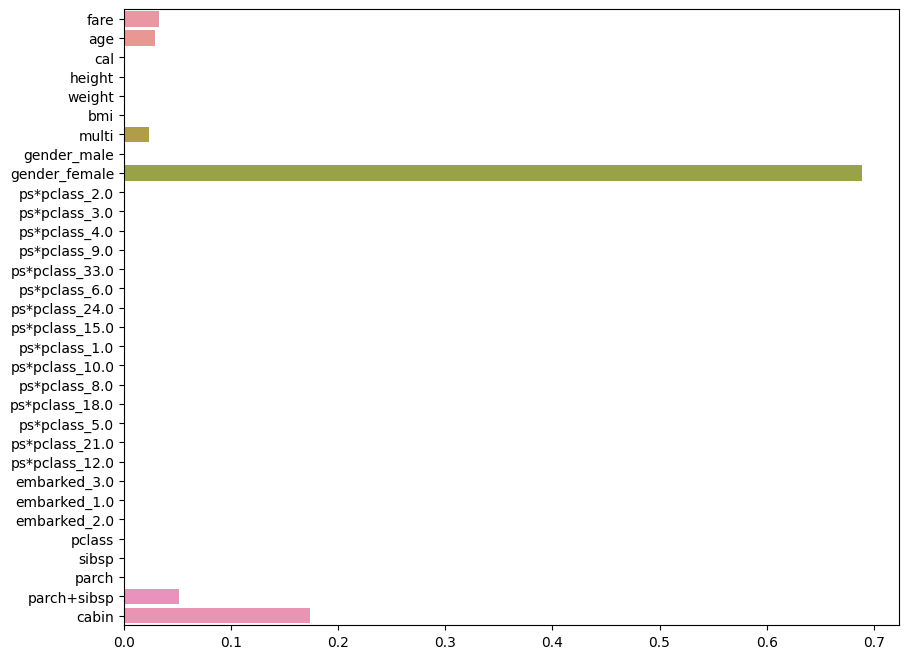

In [74]:
plt.figure(figsize=(10,8))

sns.barplot(x=dt.feature_importances_,y=df_tr.columns)
plt.show()

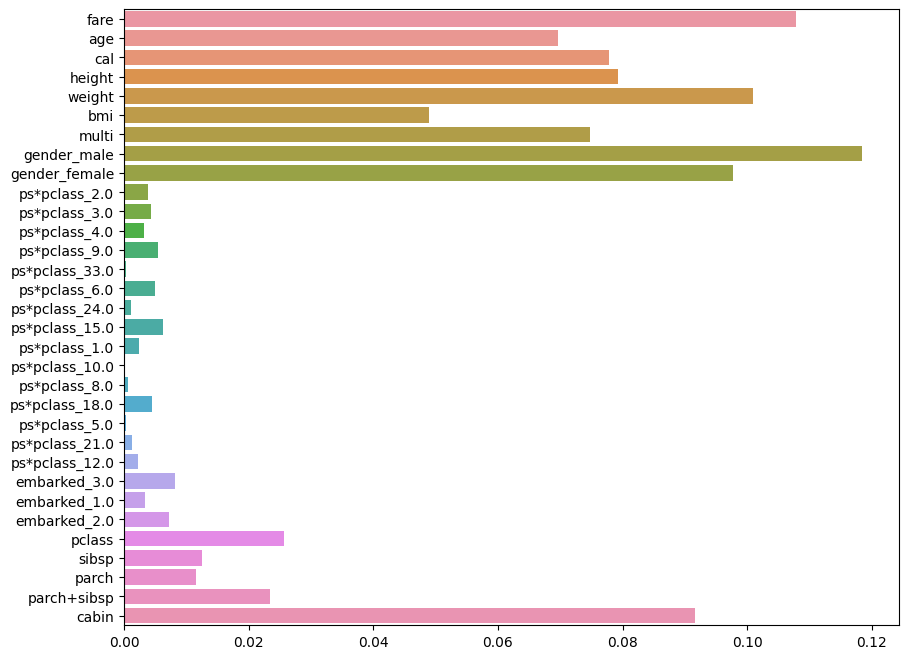

In [75]:
plt.figure(figsize=(10,8))

sns.barplot(x=rf.feature_importances_,y=df_tr.columns)
plt.show()

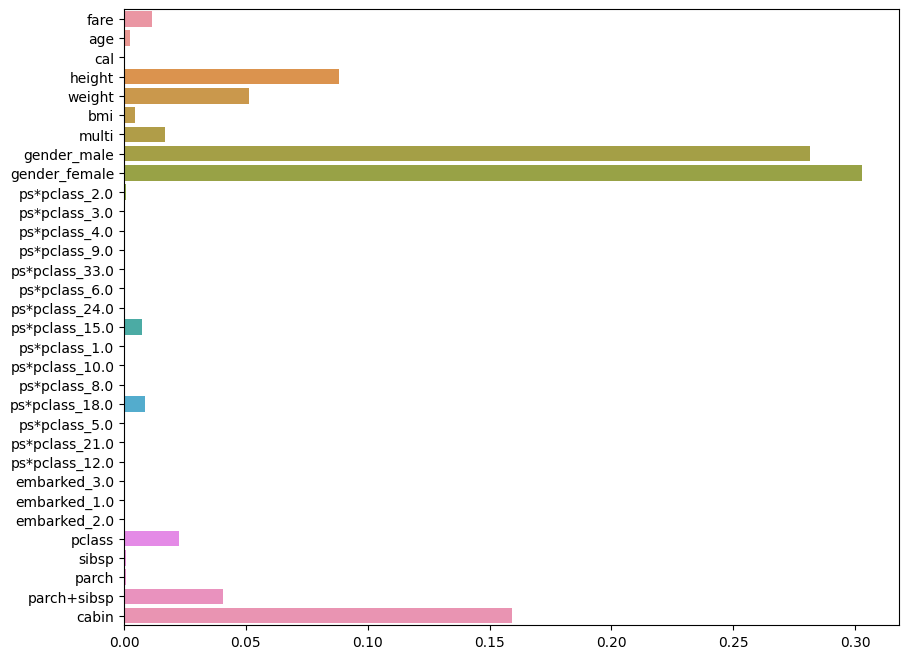

In [76]:
plt.figure(figsize=(10,8))

sns.barplot(x=gradient.feature_importances_,y=df_tr.columns)
plt.show()

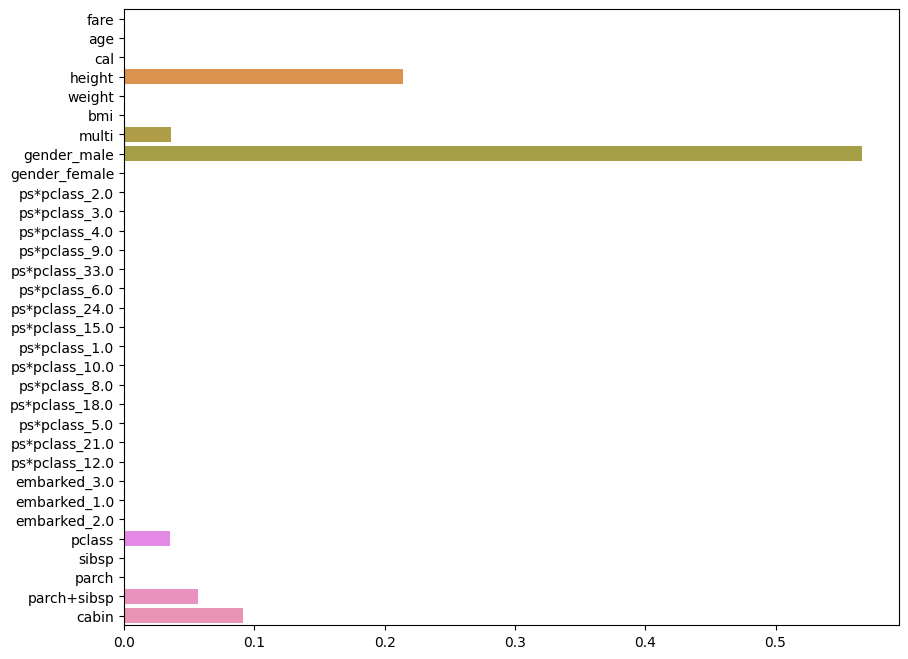

In [77]:
plt.figure(figsize=(10,8))

sns.barplot(x=xgb.feature_importances_,y=df_tr.columns)
plt.show()

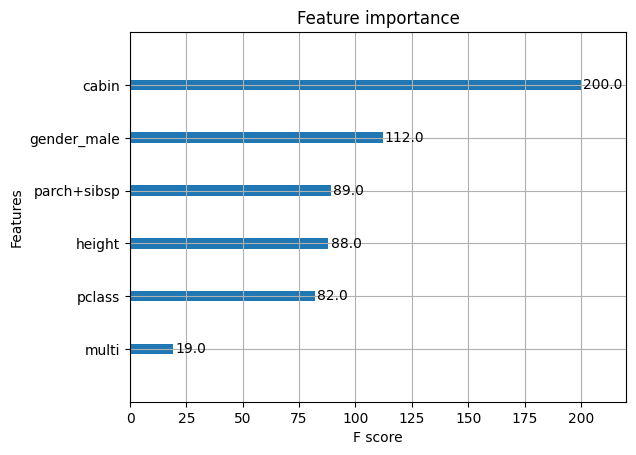

In [78]:
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.show()